# Library yang digunakan

In [ ]:
# Import library
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import RMSprop

# Load data

In [ ]:
# Load data
from tensorflow.keras.datasets import cifar10

# Load the training and test split of the cifar10 dataset
(training_images, training_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
train_shape = training_images.shape
test_shape = test_images.shape

print(f'Terdapat {train_shape[0]} contoh dengan bentuk ({train_shape[1]}, {train_shape[2]}) dan dengan {train_shape[3]} warna pada data gambar latih')
print(f'Terdapat {test_shape[0]} contoh dengan bentuk ({test_shape[1]}, {test_shape[2]}) dan dengan {test_shape[3]} warna pada data gambar uji')

Terdapat 50000 contoh dengan bentuk (32, 32) dan dengan 3 warna pada data gambar latih
Terdapat 10000 contoh dengan bentuk (32, 32) dan dengan 3 warna pada data gambar uji


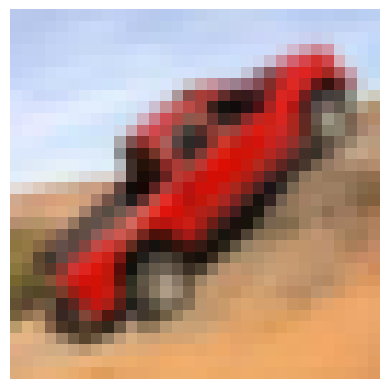

LABEL: [1]


In [ ]:
plt.imshow(training_images[140])
plt.axis('off')
plt.show()
print(f'LABEL: {training_labels[140]}')

In [ ]:
# Set number of characters per row when printing
np.set_printoptions(linewidth=320)
print(f'Bentuk dari sisi data: \n {training_images[3]}')

Bentuk dari sisi data: 
 [[[ 28  25  10]
  [ 37  34  19]
  [ 38  35  20]
  ...
  [ 76  67  39]
  [ 81  72  43]
  [ 85  76  47]]

 [[ 33  28  13]
  [ 34  30  14]
  [ 32  27  12]
  ...
  [ 95  82  55]
  [ 96  82  56]
  [ 85  72  45]]

 [[ 39  32  15]
  [ 40  33  17]
  [ 57  50  33]
  ...
  [ 93  76  52]
  [107  89  66]
  [ 95  77  54]]

 ...

 [[ 83  73  52]
  [ 87  77  56]
  [ 84  74  52]
  ...
  [ 99  93  70]
  [ 90  84  61]
  [ 81  75  52]]

 [[ 88  72  51]
  [ 90  74  52]
  [ 93  77  56]
  ...
  [ 80  74  53]
  [ 76  70  49]
  [ 82  76  55]]

 [[ 97  78  56]
  [ 94  75  53]
  [ 93  75  53]
  ...
  [ 54  47  28]
  [ 63  56  37]
  [ 72  65  46]]]


# Data Processing

In [ ]:
# Normalisasi nilai piksel
training_images = training_images / 255.0
test_images = test_images / 255.0

# One-hot encoding
training_labels = to_categorical(training_labels)
test_labels = to_categorical(test_labels)

# Membangun Model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape = (32,32,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(training_images, training_labels, epochs=15, batch_size=32, verbose=1, shuffle=True, validation_data=(test_images, test_labels))

Epoch 1/15
1563/1563 [==============================] - 20s 6ms/step - loss: 1.7516 - accuracy: 0.3613 - val_loss: 1.5098 - val_accuracy: 0.4446
Epoch 2/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4416 - accuracy: 0.4792 - val_loss: 1.3347 - val_accuracy: 0.5320
Epoch 3/15
1563/1563 [==============================] - 9s 5ms/step - loss: 1.3061 - accuracy: 0.5321 - val_loss: 1.2051 - val_accuracy: 0.5706
Epoch 4/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2083 - accuracy: 0.5712 - val_loss: 1.1754 - val_accuracy: 0.5897
Epoch 5/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1286 - accuracy: 0.6025 - val_loss: 1.1266 - val_accuracy: 0.5992
Epoch 6/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0641 - accuracy: 0.6274 - val_loss: 1.0169 - val_accuracy: 0.6446
Epoch 7/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0136 - accuracy: 0.6421 - val_loss: 0.9548 - val_accuracy

# Grafik

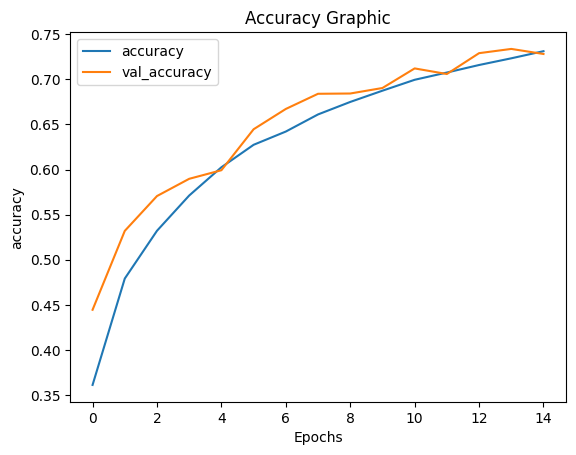

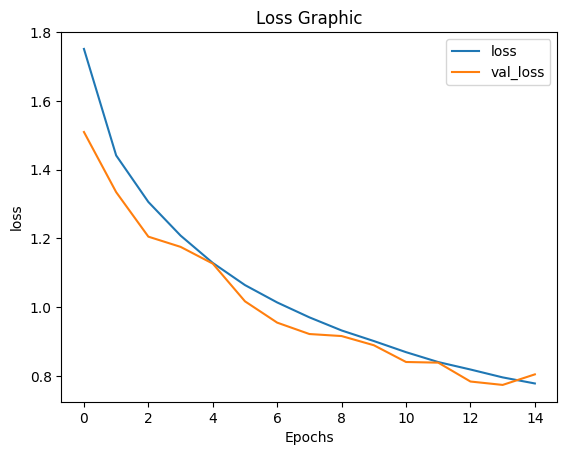

In [ ]:
def plot_graphs(history, string, title):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.title(title)
  plt.show()

plot_graphs(history, "accuracy", "Accuracy Graphic")
plot_graphs(history, "loss", "Loss Graphic")

# Evaluasi dan Prediksi

In [ ]:
# Mengevaluasi model pada data yang belum dilihat
eval = model.evaluate(test_images, test_labels)
print(f'Test loss: {eval[0]} \nTest accuracy: {eval[1]}')

313/313 [==============================] - 1s 3ms/step - loss: 0.8042 - accuracy: 0.7280
Test loss: 0.804233968257904 
Test accuracy: 0.7279999852180481


1/1 [==============================] - 0s 192ms/step


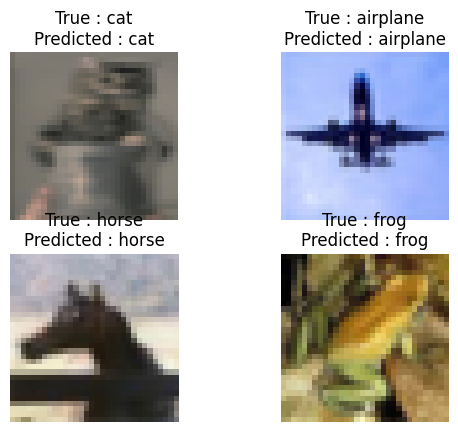

In [ ]:
dict_label = {0:'airplane', 1:'automobile', 2:'bird',
              3:'cat', 4:'deer', 5:'dog',
              6:'frog', 7:'horse', 8:'ship', 9:'truck'}

def predict():
  some_random_number = np.random.randint(low=0, high=len(test_images)-1, size=4)
  sample_images = training_images[some_random_number]
  sample_label = training_labels[some_random_number]
  predicted = model.predict(sample_images)
  predicted = np.argmax(predicted, axis = 1)
  true_label = np.argmax(sample_label, axis = 1)
  fig, axs = plt.subplots(2, 2)
  for row in range(2):
    for col in range(2):
      if row == 0:
        true = true_label[row+col]
        pred = predicted[row+col]
        axs[row, col].imshow(sample_images[row+col])
      else:
        true = true_label[row+col+1]
        pred = predicted[row+col+1]
        axs[row,col].imshow(sample_images[row+col+1])
      axs[row,col].set_title('True : %s\nPredicted : %s' % (dict_label[true], dict_label[pred]))
      axs[row,col].axis('off')

predict()